## Homework 2

#### John Stachurski

OSM 2018

### Exercise 1

Write your own version of a one dimensional [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation), which estimates a density from a sample.

Write it as a class that takes the data $X$ and bandwidth $h$ when initialized and provides a method $f$ such that

$$
    f(x) = \frac{1}{hn} \sum_{i=1}^n 
    K \left( \frac{x-X_i}{h} \right)
$$

For $K$ use the Gaussian kernel ($K$ is the standard normal density).

Write the class so that the bandwidth defaults to Silverman's rule (see the "rule of thumb" discussion on [this page](https://en.wikipedia.org/wiki/Kernel_density_estimation)).  Test the class you have written by going through the steps

1. simulate data $X_1, \ldots, X_n$ from distribution $\phi$
2. plot the kernel density estimate over a suitable range
2. plot the density of $\phi$ on the same figure

for distributions $\phi$ of the following types


* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 2$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = 2$ and $\beta = 5$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 0.5$

Use $n=100$.

Make a comment on your results.  (Do you think this is a good estimator of these distributions?)

In [3]:
import numpy as np
from scipy.stats import norm
from scipy.stats import beta
import matplotlib.pyplot as plt

In [8]:
class kde():
    def __init__(self, X, h=None):
        self.X=X
        self.n=len(self.X)
        if not h:
            self.h = (1.06*np.sqrt(np.var(self.X)))*(self.n)**(-.2)
        else:
            self.h = h
    def f(self, x):
        y = np.zeros(len(x))
        outside = 1/(self.h*self.n)
        for j in range(len(x)):
            s = 0
            for i in range(self.n):
                inside = (x[j] - self.X[i])/(self.h) 
                s += outside*norm.pdf(inside)
            y[j] = s
        return y

In [9]:
X_1 = np.random.beta(2, 2, 100)
X_2 = np.random.beta(2, 5, 100)
X_3 = np.random.beta(0.5, 0.5, 100)

x = np.linspace(0,1,100)

K_1 = kde(X_1)
K_2 = kde(X_2)
K_3 = kde(X_3)

f_1 = K_1.f(x)
f_2 = K_2.f(x)
f_3 = K_3.f(x)

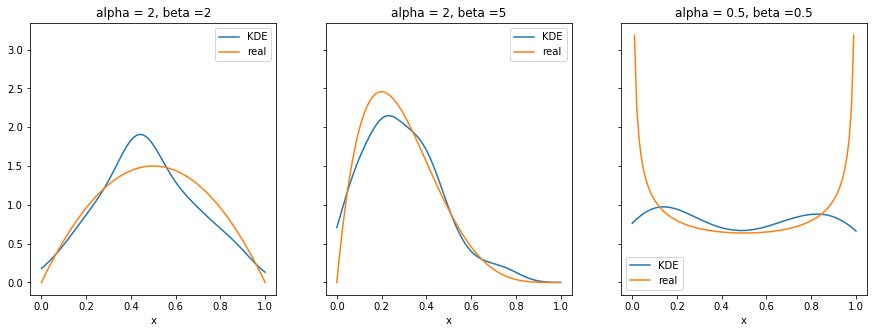

In [28]:
fig1,(ax1,ax2,ax3)=plt.subplots(1, 3, sharey=True,figsize=(15,5))
# fig1.figsize(15,15)
ax1.plot(x, f_1)
ax1.plot(x, beta.pdf(x, 2, 2))
ax1.legend(['KDE', 'real'])
ax1.set_xlabel('x')
ax1.set_title('alpha = 2, beta =2')
ax2.plot(x, f_2)
ax2.plot(x, beta.pdf(x, 2, 5))
ax2.legend(['KDE', 'real'])
ax2.set_xlabel('x')
ax2.set_title('alpha = 2, beta =5')
ax3.plot(x, f_3)
ax3.plot(x, beta.pdf(x, 0.5, 0.5))
ax3.legend(['KDE', 'real'])
ax3.set_xlabel('x')
ax3.set_title('alpha = 0.5, beta =0.5')
plt.show()

### Exercise 2

In class we discussed the following fact:  For the $AR(1)$ process

$$ X_{t+1} = \rho X_t + b + \sigma \xi_{t+1} $$

with $\{ \xi_t \}$ iid and standard normal, 

$$ 
    \psi_t = N(\mu, s^2) \implies \psi_{t+1} 
    = N(\rho \mu + b, \rho^2 s^2 + \sigma^2) 
$$

Confirm this, at least approximately, by simulation.  Let

* $\rho = 0.9$
* $b = 0.0$
* $\sigma = 0.1$
* $\mu = -3$
* $s = 0.2$

First, plot $\psi_t$ and $\psi_{t+1}$ using the true distributions described above.

Second, plot $\psi_{t+1}$ on the same figure (in a different color) as follows:

1. Generate $n$ draws of $X_t$ from the $N(\mu, s^2)$ distribution
2. Update them all using the rule $X_{t+1} = \rho X_t + b + \sigma \xi_{t+1}$
3. Use the resulting sample of $X_{t+1}$ values to produce a density estimate via kernel density estimation.

Try this for several different values of $n$ and confirm that the simulation based estimate of $\psi_{t+1}$ does converge to the theoretical distribution.

In [29]:
rho = 0.9
b = 0.0
sigma = 0.1
mu = -3
s = 0.2

In [30]:
X_t = np.random.normal(mu,s,100)
shocks = norm.pdf(0, 1, 100)
X_t1 = rho*X_t + b + sigma*shocks

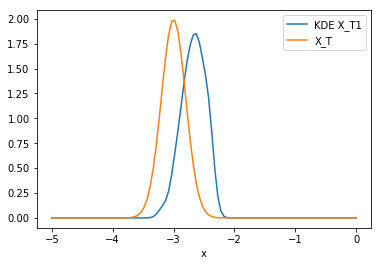

In [33]:
x = np.linspace(-5,0,100)

K_t1 = kde(X_t1)
f_t1 = K_t1.f(x)
plt.plot(x, f_t1)
plt.plot(x, norm.pdf(x,mu,s))
plt.legend([r'KDE X_T1', r'X_T'])
plt.xlabel('x')
plt.show()

### Exercise 3

In the lecture it was claimed that, for $n \times n$ matrix $A$, we have

$$ r(A) < 1 \implies A^k \to 0 $$

where convergence is in terms of the spectral norm.  

Prove this using Gelfand's formula.

From the Gelfand's formula, we know that:

$||A^k||^{1/k} \to r(A)$.

By the continuous mapping theorem, we rearrange the above formula:

$||A^k|| \to r(A)^{k}$

Since from the settings, we have:

$ r(A) &lt; 1 \implies lim_{k \to \infty} r(A)^k = 0 $

Therefore, we have $lim_{k \to \infty}||A^k|| = 0$